(era5-x0.25)=

# era5-x0.25

## Collection Overview

The ERA5 dataset is the latest climate reanalysis product produced by the European Centre for Medium-Range Weather Forecasts (ECMWF).
The raw ERA5 dataset is available at a spatial resolution of 0.25 degrees and a temporal resolution of 1 hour and is available from 1940 to present.

The Climate Change Knowledge Portal provides a re-gridded version of the ERA5 dataset at a 0.5 degree spatial resolution to match the spatial grid of other datasets available on the portal.
The re-gridded dataset is available between 1950 and 2020 with aggregated daily values for the following variables:

**Temperature:**

- Avg Mean Temp
- Avg Max Temp
- Avg Min Temp
- Cold Spell Duration Index
- Cooling Degree Days (ref 65F)
- Heating Degree Days (ref 65F)
- Maximum of Daily Max-Temperature
- Minimum of Daily Minimum Temperature
- Number of Frost Days (Tmin<0C)
- Number of Days with Heat Index >35C
- Number of Hot Days (Tmax>35C)
- Number of Hot Days (Tmax>40C)
- Number of Ice Days (Tmax<0C)
- Number of Summer Days (Tmax>25C)
- Number of Tropical Nights (Tmin>20C)
- Warm Spell Duration Index

**Precipitation:**

- Max Number of Consecutive Dry Days
- Max Number of Consecutive Wet Days
- Days with Precip >20mm
- Days with Precip >50mm
- Average Largest 1-Day Precipitation
- Average Largest 5-Day Cumulative Precipitation
- Precipitation (sum)
- Precipitation Percent Change
- Precipitation Amount During Wettest Days

**Additional:**

- Growing Season Length
- Relative Humidity

## Dimensions

The ERA5 data has the following dimensions:

  - **time** (*datetime64[ns]*) - The time dimension for the data
  - **lat** (*float64*) - The latitude dimension for the data, 0.5° resolution.
  - **lon** (*float64*) - The longitude dimension for the data, 0.5° resolution.
  - **bnds** (*int64*) - The bounds dimension for the data, [0, 1] for each coordinate.

Data variables are organized with respect to those dimensions and can be queried by index, or by dimension.

## Example Data

In the following section, we explore some sample data from the CRU dataset.

### Reading the `.nc` file

We use [`xarray`](https://docs.xarray.dev), to read in the `.nc` file as an `xarray.Dataset` object.

In [1]:
import xarray as xr

In [2]:
data = xr.open_dataset("../natvar-pr-annual-mean_era5-x0.5_era5-x0.5-historical_climatology_mean_1995-2014.nc")

### Examining the data

We can examine the data by printing the `xarray.Dataset` object.
Specifically, we can see the dimensions, coordinates, and data variables.

Further examination of the data can be done by viewing an individual coordinate, data variable, or the attributes of the dataset.

In [3]:
data

<xarray.Dataset>
Dimensions:                (time: 1, lat: 360, lon: 720, bnds: 2)
Coordinates:
  * time                   (time) datetime64[ns] 1995-07-01
  * lat                    (lat) float64 -89.75 -89.25 -88.75 ... 89.25 89.75
  * lon                    (lon) float64 -179.8 -179.2 -178.8 ... 179.2 179.8
  * bnds                   (bnds) int32 0 1
Data variables:
    natvar-pr-annual-mean  (time, lat, lon) float32 ...
    lon_bnds               (lon, bnds) float64 ...
    lat_bnds               (lat, bnds) float64 ...
Attributes: (12/25)
    wb_truncation_label:   2
    wb_grid_label:         x0.5
    wb_period_label:       1995-2014
    wb_percentile_label:   mean
    wb_type_label:         climatology
    wb_model_label:        era5
    ...                    ...
    Conventions:           CF-1.6
    NETCDF_COMPRESSION:    NCO: Precision-preserving compression to netCDF4/H...
    history:               Fri Nov 13 19:17:20 2020: ncks -4 --ppc default=7 ...
    NCO:                   netCDF Operators version 4.7.9 (Homepage = http://...
    comment:               Processed ERA5 data by WB; RAW-data from ECMWF: ht...
    wb:                     \nwb_access_citation = Please acknowledge data so...

In [4]:
data['time']

<xarray.DataArray 'time' (time: 1)>
array(['1995-07-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1995-07-01
Attributes:
    axis:     T

In [5]:
data['lon_bnds']

<xarray.DataArray 'lon_bnds' (lon: 720, bnds: 2)>
[1440 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * bnds     (bnds) int32 0 1
Attributes:
    standard_name:  lon_bnds
    long_name:      lon_bnds

In [6]:
data.attrs

{'wb_truncation_label': 2,
 'wb_grid_label': 'x0.5',
 'wb_period_label': '1995-2014',
 'wb_percentile_label': 'mean',
 'wb_type_label': 'climatology',
 'wb_model_label': 'era5',
 'wb_variant_label': 'x0.5',
 'wb_scenario_label': 'historical',
 'wb_statistic_label': 'mean',
 'wb_aggregation_label': 'annual',
 'wb_variable_label': 'pr',
 'wb_product_label': 'natvar',
 'wb_collection_label': 'era5-x0.5',
 'wb_OBS': ' \nwb_creation_date = Sat Oct 21 15:10:12 MDT 2023\nwb_OBS_version = 2.0 (summer 2022)',
 'DATA_SOURCE': 'ECMWF: https://cds.climate.copernicus.eu, Copernicus Climate Data Store',
 'NETCDF_CONVERSION': 'CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.',
 'NETCDF_VERSION': '4.7.3',
 'CONVERSION_PLATFORM': 'Linux r8i5n27 4.12.14-95.51-default #1 SMP Fri Apr 17 08:14:12 UTC 2020 (c6bab98) x86_64 x86_64 x86_64 GNU/Linux',
 'CONVERSION_DATE': 'Fri Nov 13 19:17:11 MST 2020',
 'Conventions': 'CF-1.6',
 'NETCDF_COMPRESSION': 'NCO: Precision-preserving compression to netCDF4/HDF5

### Visualizing the data

We can visualize the primary data variable in the example dataset, *natvar-pr-annual-mean* (if `matplotlib` is installed), by using the built-in `.plot()` method of the `xarray.DataArray` object.

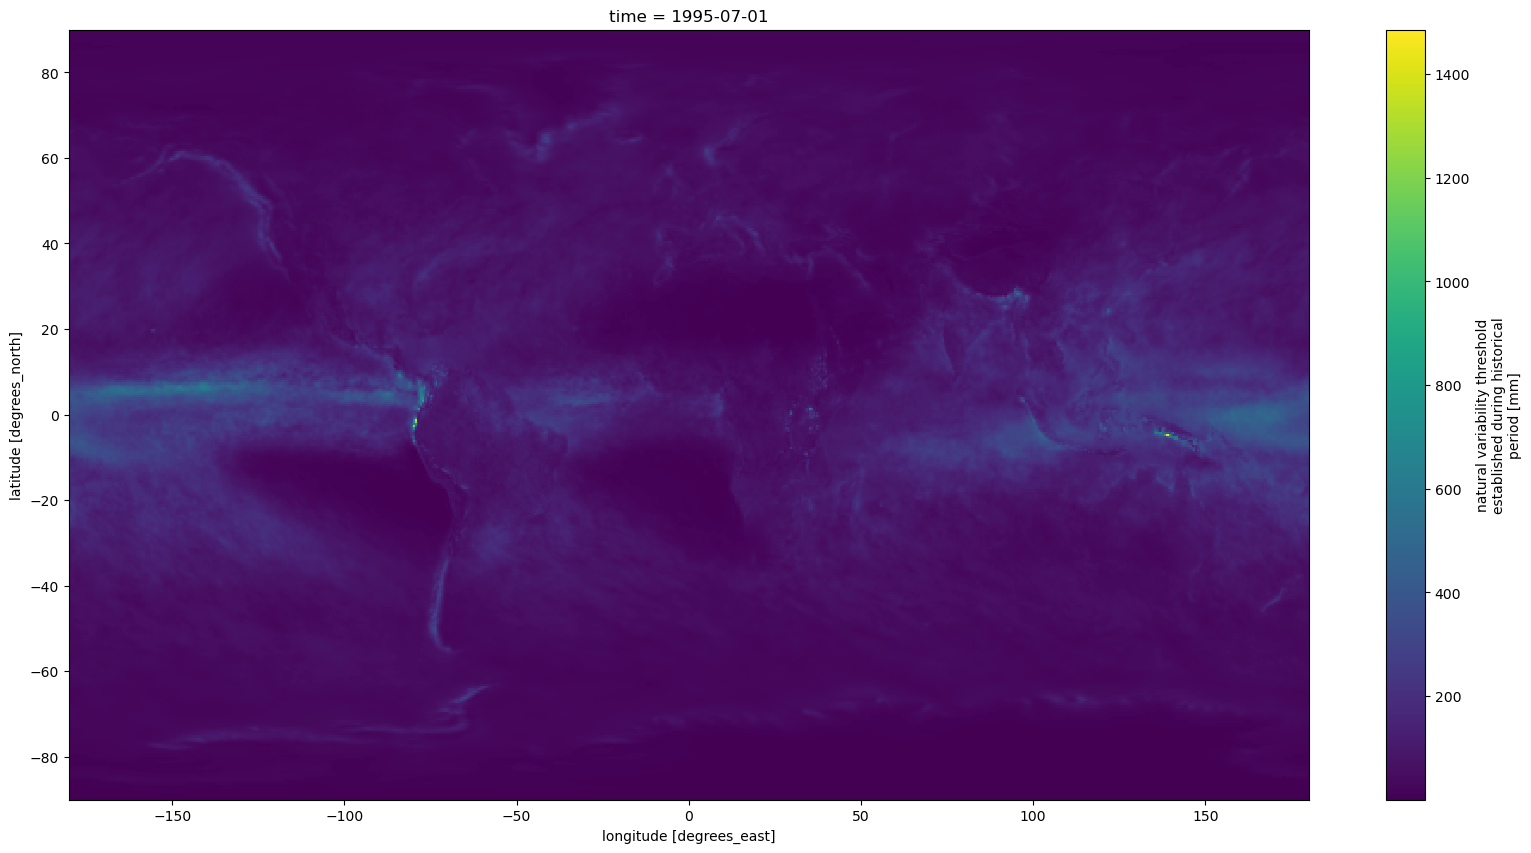

In [7]:
data["natvar-pr-annual-mean"].plot(figsize=(20,10))